In [1]:
from expert import local_content_graph as lcg
import glob
import random

In [2]:
nlp_path = '/home/grac833/expert/deliverables/2021-04-01/enriched_data/nlp/acl_np_output/'
spert_path = '/home/grac833/expert/spert/data/acl_scierc/by_paper/'

In [12]:
#select random ACL abstract
nlp_files = glob.glob(f'{nlp_path}/*.jsonl')
nlp_fn = random.choice(nlp_files)
ner_fn = nlp_fn.replace(nlp_path,spert_path).replace('__coref-srl-svo-pos_np.jsonl','.json')
fn_id = nlp_fn.split('/')[-1].split('__')[0].split('.')[0]

print(nlp_fn)
print(ner_fn)
print(fn_id)

/home/grac833/expert/deliverables/2021-04-01/enriched_data/nlp/acl_np_output/song-etal-2019-leveraging.tei__coref-srl-svo-pos_np.jsonl
/home/grac833/expert/spert/data/acl_scierc/by_paper/song-etal-2019-leveraging.tei.json
song-etal-2019-leveraging


## Generate local graph using NLP and NER output files

In [13]:
graph = lcg.localContentGraph(nlp_file=nlp_fn,ner_tag_file=ner_fn)

/home/grac833/anaconda3/envs/expert/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/grac833/anaconda3/envs/expert/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


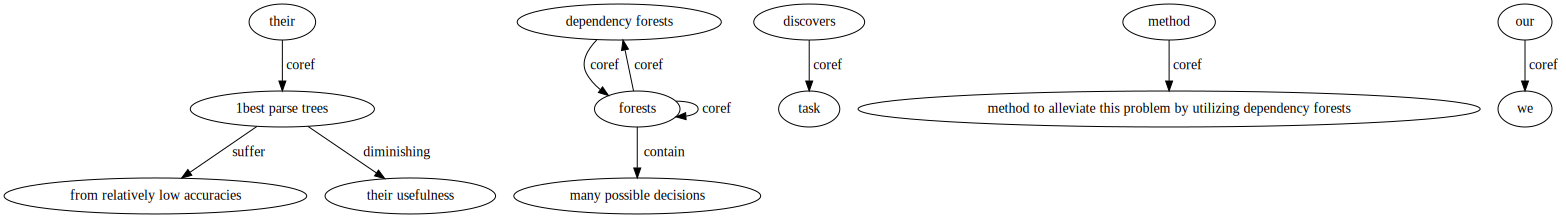

In [14]:
graph.srl_graph(rankdir='TB')

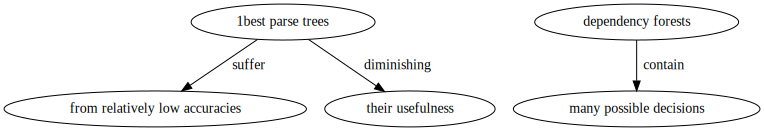

In [15]:
graph.srl_graph(rankdir='TB',collapse_coref=True)

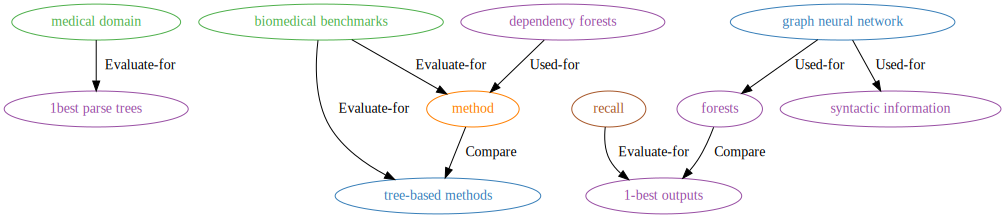

In [16]:
graph.ner_graph(rankdir='TB')

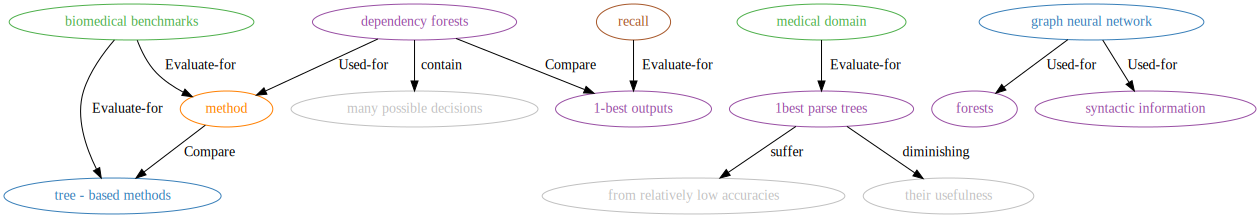

In [17]:
graph.combined_graph(rankdir='TB')

In [9]:
graph.save_graph(fn_id,path='./')

## Generate local graph using text input

In [18]:
text = "The quality of automatic metrics for machine translation has been increasingly called into question, especially for high-quality systems. This paper demonstrates that, while choice of metric is important, the nature of the references is also critical. We study different methods to collect references and compare their value in automated evaluation by reporting correlation with human evaluation for a variety of systems and metrics. Motivated by the finding that typical references exhibit poor diversity, concentrating around translationese language, we develop a paraphrasing task for linguists to perform on existing reference translations, which counteracts this bias. Our method yields higher correlation with human judgment not only for the submissions of WMT 2019 English to German, but also for Back-translation and APE augmented MT output, which have been shown to have low correlation with automatic metrics using standard references. We demonstrate that our methodology improves correlation with all modern evaluation metrics we look at, including embedding-based methods.To complete this picture, we reveal that multi-reference BLEU does not improve the correlation for high quality output, and present an alternative multi-reference formulation that is more effective."

graph = lcg.localContentGraph(text=text,
                              spert_path='/home/grac833/expert/experttoolkit/expert/spert/')

Processing data for SPERT...
--------------------------------------------------
Config:
{'model_type': 'spert', 'model_path': '/home/grac833/expert/experttoolkit/expert/spert//data/models/scierc', 'tokenizer_path': '/home/grac833/expert/experttoolkit/expert/spert//data/models/scierc', 'dataset_path': '/home/grac833/expert/experttoolkit/expert/spert//data/datasets/local_graphs/temp.json', 'types_path': '/home/grac833/expert/experttoolkit/expert/spert//data/datasets/scierc/scierc_types.json', 'predictions_path': '/home/grac833/expert/experttoolkit/expert/spert//data/datasets/local_graphs/predictions_temp.json', 'spacy_model': 'en_core_web_sm', 'eval_batch_size': '1', 'rel_filter_threshold': '0.4', 'size_embedding': '25', 'prop_drop': '0.1', 'max_span_size': '10', 'sampling_processes': '4', 'max_pairs': '1000'}
Repeat 1 times
--------------------------------------------------
Iteration 0
--------------------------------------------------


/home/grac833/anaconda3/envs/expert/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Predict: 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]


Running AllenNLP coref


Some weights of BertModel were not initialized from the model checkpoint at SpanBERT/spanbert-large-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


With batch size: 100. Total sentences/documents: 7
Starting batch 0 of 0 with batch size of 100
Finished Batch 0 of 0 with batch size of 100
Predictions done!
Formatting results...
Done!
Running AllenNLP srl
With batch size: 100. Total sentences/documents: 7
Starting batch 0 of 0 with batch size of 100
Finished Batch 0 of 0 with batch size of 100
Predictions done!
Formatting results...
Done!
Beginning part of speech tagging
Done!
Beginning noun phrase extraction
Done!


/home/grac833/anaconda3/envs/expert/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/grac833/anaconda3/envs/expert/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/grac833/anaconda3/envs/expert/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


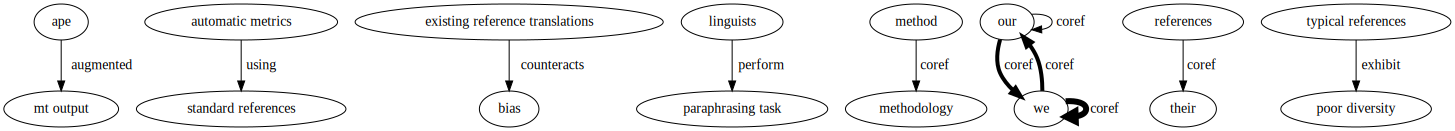

In [19]:
graph.srl_graph(rankdir='TB')

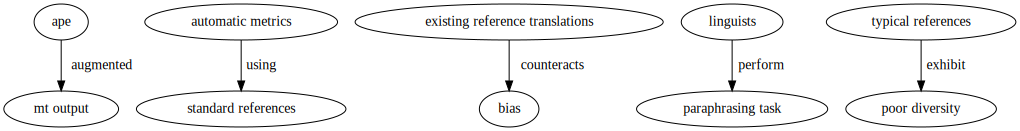

In [20]:
graph.srl_graph(rankdir='TB',collapse_coref=True)

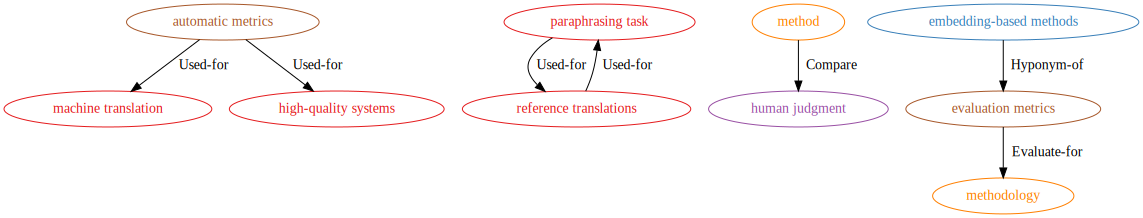

In [21]:
graph.ner_graph(rankdir='TB')

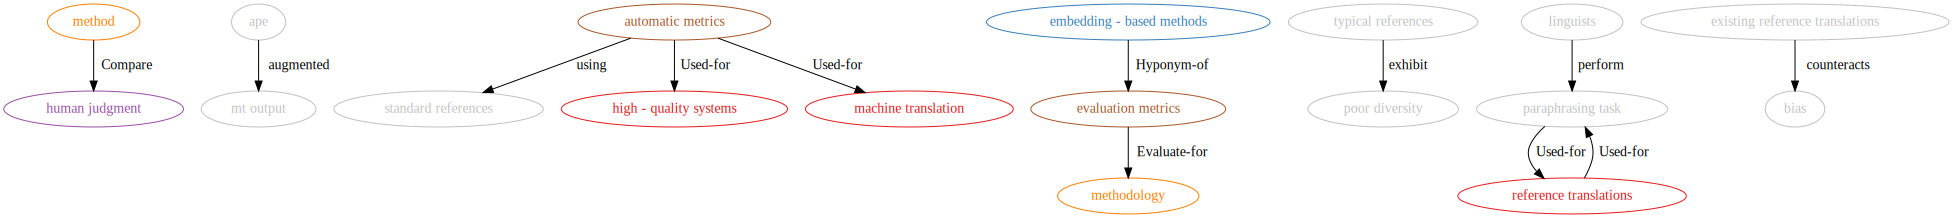

In [22]:
graph.combined_graph(rankdir='TB')